### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, 1024)]

In [4]:
data = pd.read_csv('data/sacharose_1000/all.csv', sep = '\t').iloc[:,:-1]

In [5]:
data.columns = names

In [6]:
def load_spectrum(data, moment_of_time):
    ppm = data['ppm']
    intensity = data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [7]:
sp1 = load_spectrum(data, 1)
sp1023 = load_spectrum(data, 1023)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


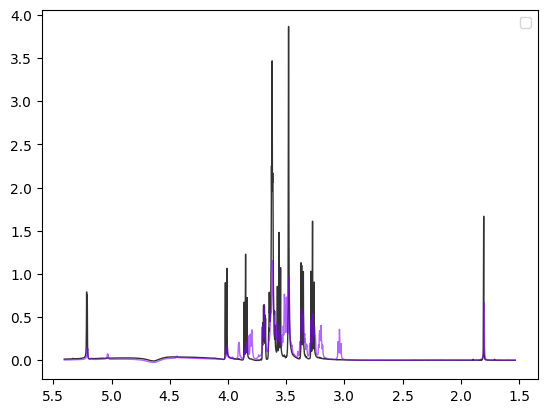

In [8]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp1, sp1023], profile=True)

### Estimation

In [9]:
kappa = 0.1
kappa_th = 1

In [10]:
proportions_in_times = []
noise_proportions_in_times = []

sp1 = load_spectrum(data, 1)
sp1.trim_negative_intensities()
sp1.normalize()

for i in range(2, 1024):
    print('This is timepoint '+str(i)+'.\n')
    current = load_spectrum(data, i)
    previous = load_spectrum(data, i-1)
    estimation = estimate_proportions(current, [previous], what_to_compare='area',
                                      solver=pulp.GUROBI(msg=False),
                                     MTD=kappa, MTD_th=kappa_th)

    proportions_in_times.append(estimation['proportions'])
    noise_proportions_in_times.append(estimation['proportion_of_noise_in_components'])
    
    print('Proportions:\n')
    print(estimation['proportions'])
    print('\n')
    print('Proportion_of_noise_in_components:\n')
    print(estimation['proportion_of_noise_in_components'])
    print('\n')

This is timepoint 2.

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-13
The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.


/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Proportions:

[0.9795728136650027]


Proportion_of_noise_in_components:

0.0


This is timepoint 3.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9780073151949972]


Proportion_of_noise_in_components:

0.0005297897639999985


This is timepoint 4.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.996754666753006]


Proportion_of_noise_in_components:

0.0


This i

Proportions:

[0.9624131174750026]


Proportion_of_noise_in_components:

0.0


This is timepoint 21.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9805068403920028]


Proportion_of_noise_in_components:

0.0025233532830000074


This is timepoint 22.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.7969992118790021]


Proportion_of_noise_in_components:

0.0


Thi

Proportions:

[0.9710459518970026]


Proportion_of_noise_in_components:

0.0008720755430000023


This is timepoint 39.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.978125850129003]


Proportion_of_noise_in_components:

0.0011746214610000036


This is timepoint 40.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9903360319929936]


Proportion_of_noise_in_compo

TypeError: type NoneType doesn't define __round__ method

In [11]:
len(proportions_in_times)

50

In [12]:
max([prop[0] for prop in proportions_in_times])

0.9981719252010015

In [13]:
min([prop[0] for prop in proportions_in_times])

0.7969992118790021

In [16]:
rel_proportions = [1]
for i, prop in enumerate(proportions_in_times):
    rel_proportions.append(rel_proportions[-1]*prop[0])

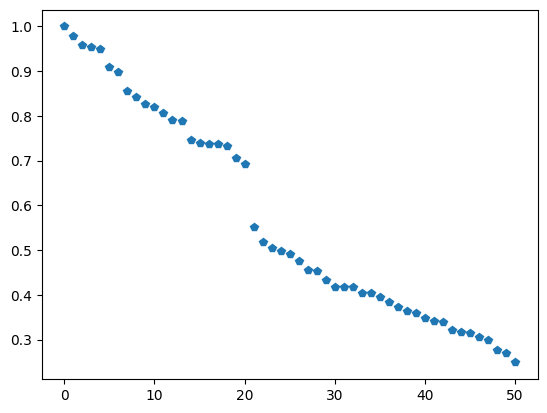

In [19]:
plt.plot(range(1+len(proportions_in_times)), rel_proportions, 'p')

In [ ]:
prop = [prop[0] for prop in proportions_in_times]

In [ ]:
with open('results/sacharose_1000/comparing_with_previous/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(prop, f)

In [ ]:
with open('results/sacharose_1000/comparing_with_previous/unknown_substrats/noise_proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(noise_proportions_in_times, f)

### Linear regression

In [15]:
with open(r'results/sacharose_1000/comparing_with_previous/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y).reshape(-1,1)

In [16]:
t = np.array(range(1,1024))

In [17]:
t_and_ones = np.vstack([t, np.ones(len(t))]).T

In [18]:
slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]

/tmp/ipykernel_4744/1288480160.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


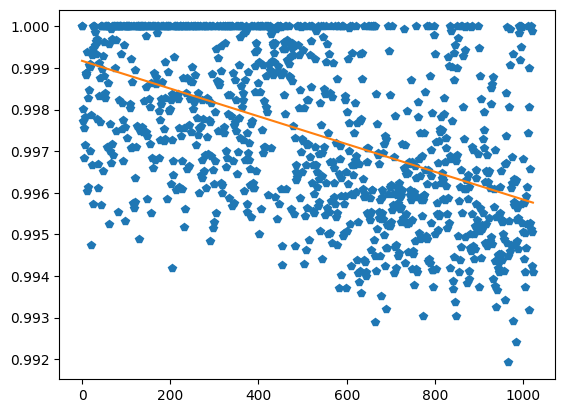

In [19]:
plt.plot(range(len(y)), [prop[0] for prop in y], 'p')
plt.plot(slope*t+intercept)